In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris

dataset = load_iris()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
dataset.filename

'iris.csv'

In [8]:
df= pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] =  dataset.target

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
df = df[df['target'] != 2]

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [14]:
X = df.drop(['target'],axis=1)
y = df['target']

In [15]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

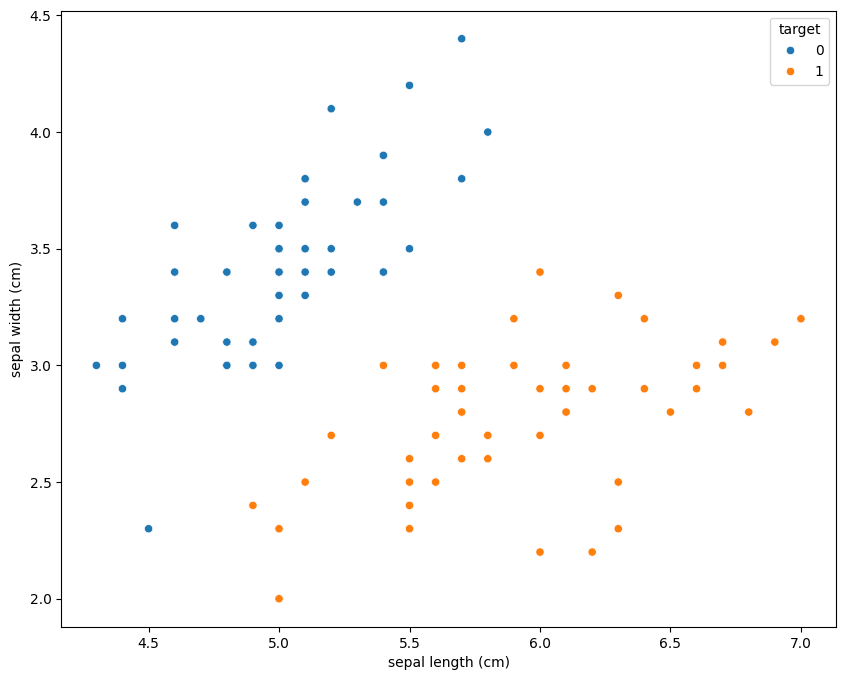

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['target'])
#sns.scatterplot(x=df, hue=df['target'])
plt.show()

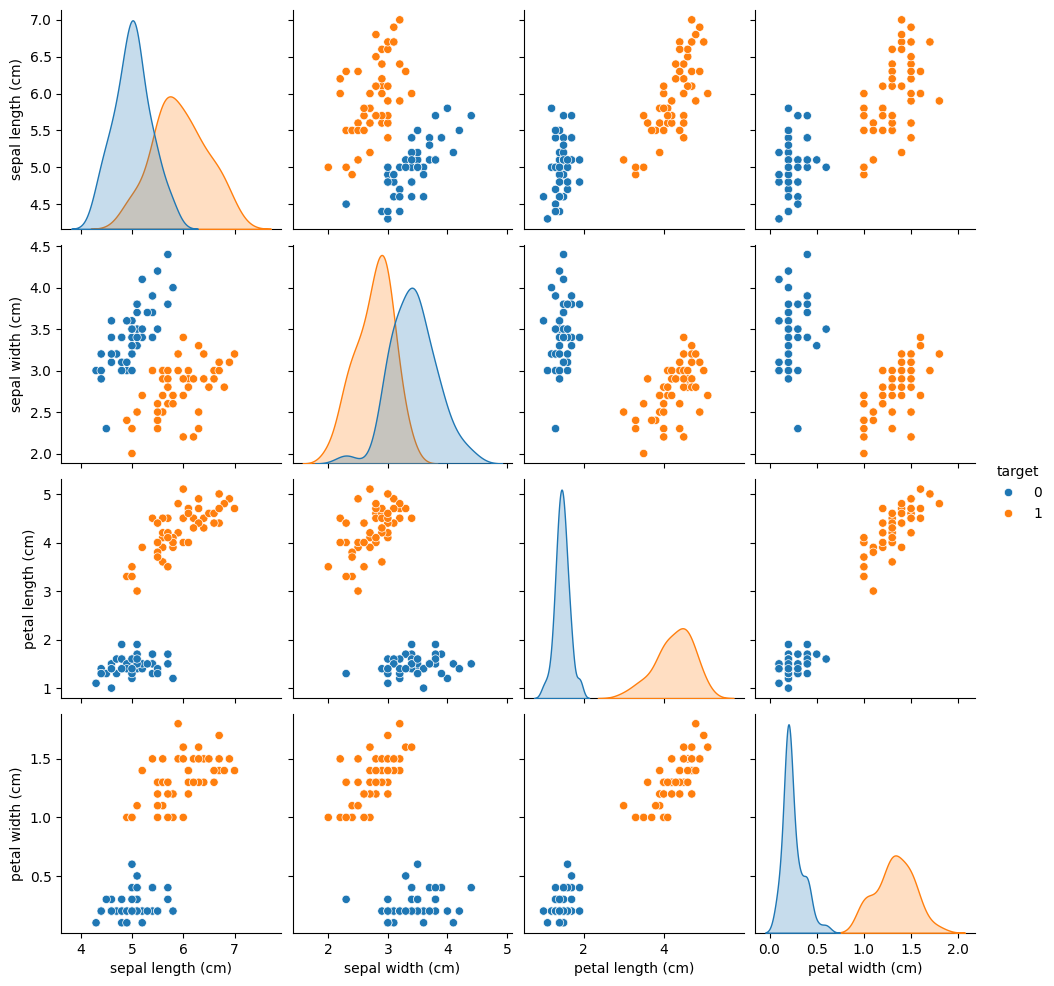

In [51]:
sns.pairplot(data=df,hue='target')
plt.show()

In [33]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# ------- *Perfoming the Train Test Split* -------

In [52]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=22)

In [53]:
Xtrain.shape, Xtest.shape

((80, 4), (20, 4))

In [54]:
ytrain.shape, ytest.shape

((80,), (20,))

# ---------- *Traning the Model* ---------- 

In [55]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

In [56]:
model.fit(Xtrain,ytrain)

SVC(kernel='linear')

In [57]:
ypred = model.predict(Xtest)

In [59]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(f"Accuracy Score: \n{accuracy_score(ytest,ypred)}")
print("\n-----------------------------------------------------------------------\n")
print(f"Confusion Metrix: \n{confusion_matrix(ytest,ypred)}")
print("\n-----------------------------------------------------------------------\n")
print(f"Classification Report: \n{classification_report(ytest,ypred)}")

Accuracy Score: 
1.0

-----------------------------------------------------------------------

Confusion Metrix: 
[[10  0]
 [ 0 10]]

-----------------------------------------------------------------------

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

